In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("/kaggle/input/heart-disease/heart_cleveland_upload.csv")

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


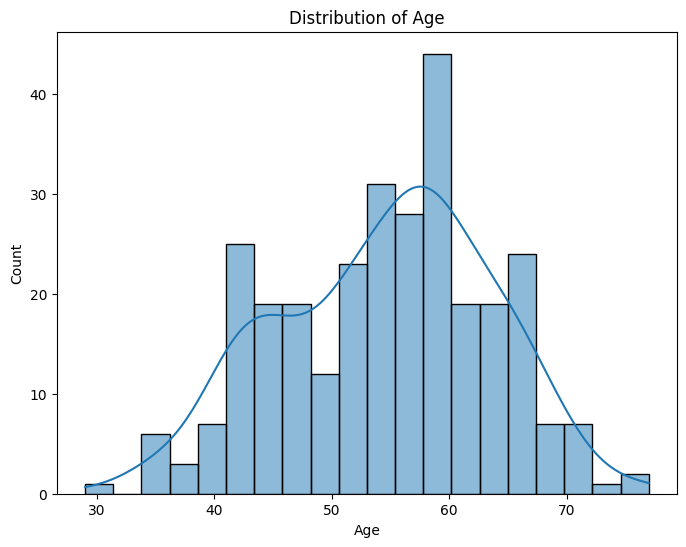

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [13]:
# Separate features and target variable
X = df.drop('condition', axis=1)
y = df['condition']

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [18]:
# Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Predictions
svm_pred = svm_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

In [20]:
svm_accuracy = accuracy_score(y_test, svm_pred)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')

SVM Accuracy: 0.73
Logistic Regression Accuracy: 0.73


In [21]:
# Cross Validation Scores
svm_cv = cross_val_score(svm_model, X, y, cv=5)
logreg_cv = cross_val_score(logreg_model, X, y, cv=5)
print(f'SVM Cross Validation Score: {np.mean(svm_cv):.2f}')
print(f'Logistic Regression Cross Validation Score: {np.mean(logreg_cv):.2f}')

SVM Cross Validation Score: 0.67
Logistic Regression Cross Validation Score: 0.81


In [23]:
# Apply PCA to reduce dimensions to 2 for visualization purposes
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

/tmp/ipykernel_30/3751190429.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.get_cmap('coolwarm', 2), alpha=0.7)


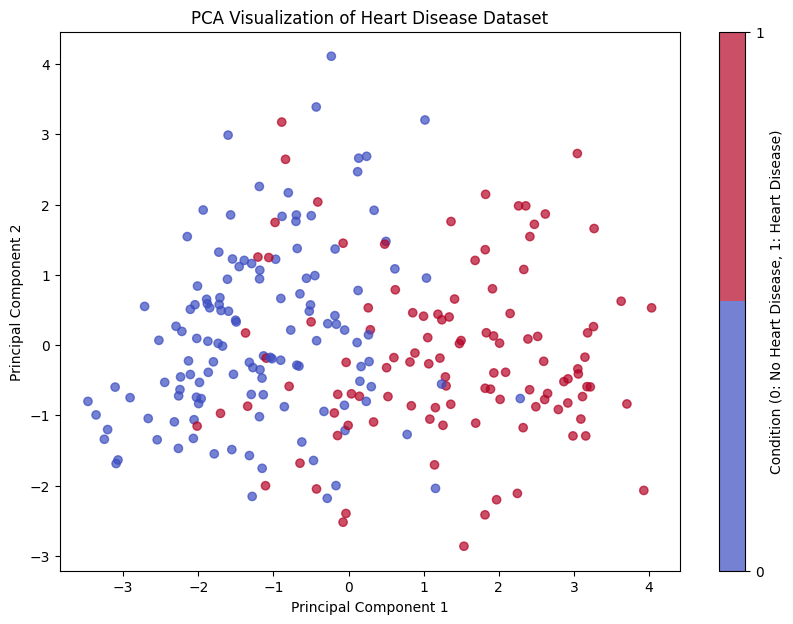

In [24]:
# Visualize the PCA projection (Heart Disease vs No Heart Disease)
plt.figure(figsize=(10, 7))
colors = ['blue', 'red']  # blue: no heart disease, red: heart disease
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.get_cmap('coolwarm', 2), alpha=0.7)
plt.colorbar(ticks=[0, 1], label='Condition (0: No Heart Disease, 1: Heart Disease)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Heart Disease Dataset')
plt.show()


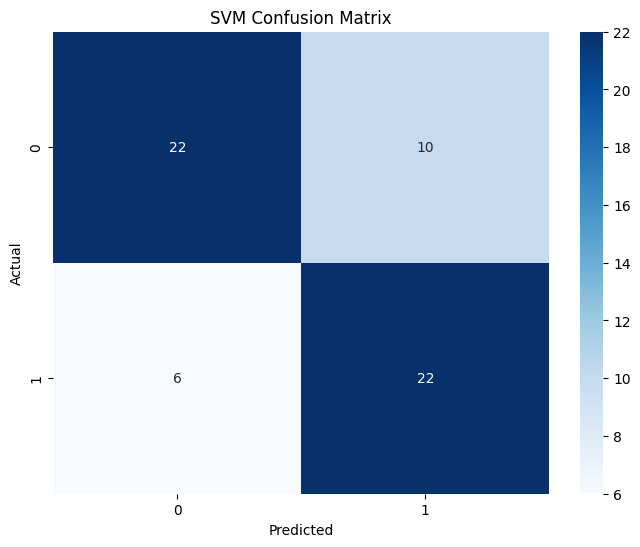

In [25]:

# Confusion Matrix Visualization for SVM
cm_svm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


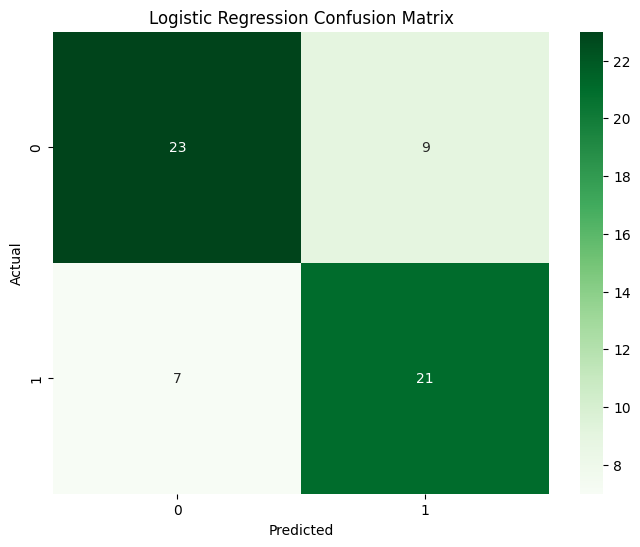

In [26]:
# Confusion Matrix Visualization for Logistic Regression
cm_logreg = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [27]:
# ROC Curve and AUC for SVM
svm_probs = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [28]:
# ROC Curve and AUC for Logistic Regression
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

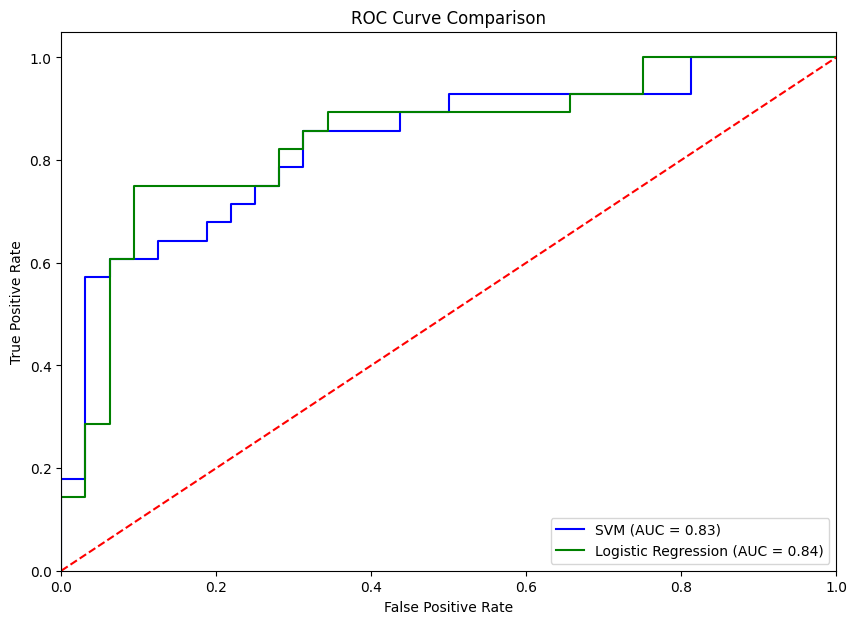

In [29]:
# Plot ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='green', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


In [30]:
# Classification Reports
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

